In [1]:
library(ggplot2)
library(dplyr)
library(lubridate)
library(knitr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
#1) read the data and import in a data.frame or tibble structure

feb = read.csv("/home/alcadis/Desktop/ASPA/Exercises/Ex1/JC-201902-citibike-tripdata.csv")
mar = read.csv("/home/alcadis/Desktop/ASPA/Exercises/Ex1/JC-201903-citibike-tripdata.csv")
apr = read.csv("/home/alcadis/Desktop/ASPA/Exercises/Ex1/JC-201904-citibike-tripdata.csv")
may = read.csv("/home/alcadis/Desktop/ASPA/Exercises/Ex1/JC-201905-citibike-tripdata.csv")
jun = read.csv("/home/alcadis/Desktop/ASPA/Exercises/Ex1/JC-201906-citibike-tripdata.csv")

head(feb,5)
nrow(feb)

,tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender
,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>
1,142,2019-02-01 15:35:02.0820,2019-02-01 15:37:24.1360,3183,Exchange Place,40.71625,-74.03346,3639,Harborside,40.71925,-74.03423,29677,Subscriber,1963,1
2,223,2019-02-01 17:00:46.8900,2019-02-01 17:04:30.5500,3183,Exchange Place,40.71625,-74.03346,3681,Grand St,40.71518,-74.03768,26234,Subscriber,1992,2
3,106,2019-02-01 17:08:01.3260,2019-02-01 17:09:47.4400,3183,Exchange Place,40.71625,-74.03346,3184,Paulus Hook,40.71415,-74.03355,29588,Subscriber,1960,1
4,370,2019-02-01 17:09:31.2100,2019-02-01 17:15:41.6550,3183,Exchange Place,40.71625,-74.03346,3211,Newark Ave,40.72153,-74.04630,29250,Subscriber,1976,1
5,315,2019-02-01 17:19:53.2490,2019-02-01 17:25:09.1400,3183,Exchange Place,40.71625,-74.03346,3273,Manila & 1st,40.72165,-74.04288,29586,Subscriber,1980,1


[1] 18565

In [3]:
#2) merge the five data frames in an unique structure

dataset = rbind(feb, mar, apr, may, jun)

head(dataset,5)
nrow(dataset)

,tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender
,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>
1,142,2019-02-01 15:35:02.0820,2019-02-01 15:37:24.1360,3183,Exchange Place,40.71625,-74.03346,3639,Harborside,40.71925,-74.03423,29677,Subscriber,1963,1
2,223,2019-02-01 17:00:46.8900,2019-02-01 17:04:30.5500,3183,Exchange Place,40.71625,-74.03346,3681,Grand St,40.71518,-74.03768,26234,Subscriber,1992,2
3,106,2019-02-01 17:08:01.3260,2019-02-01 17:09:47.4400,3183,Exchange Place,40.71625,-74.03346,3184,Paulus Hook,40.71415,-74.03355,29588,Subscriber,1960,1
4,370,2019-02-01 17:09:31.2100,2019-02-01 17:15:41.6550,3183,Exchange Place,40.71625,-74.03346,3211,Newark Ave,40.72153,-74.04630,29250,Subscriber,1976,1
5,315,2019-02-01 17:19:53.2490,2019-02-01 17:25:09.1400,3183,Exchange Place,40.71625,-74.03346,3273,Manila & 1st,40.72165,-74.04288,29586,Subscriber,1980,1


[1] 150792

In [4]:
#3) check for missing data and remove it, if any

any(is.na(dataset))

[1] FALSE

In [5]:
#4.1) compute the average and the median trip duration in minutes

tp_avg = mean(dataset$tripduration)/60
tp_median = median(dataset$tripduration)/60
print(paste("The average of the trip duration is: ", round(tp_avg,2), "minutes"))
print(paste("The median of the trip duration is: ", round(tp_median,2), "minutes"))

[1] "The average of the trip duration is:  12.81 minutes"
[1] "The median of the trip duration is:  5.68 minutes"


In [6]:
#4.2) evaluate the minimum and maximum trip duration; does that sound like a reasonable value?

tp_min = min(dataset$tripduration)/60
tp_max = max(dataset$tripduration)/60
print(paste("The min trip duration is: ", round(tp_min,2), "minutes"))
print(paste("The max trip duration is: ", round(tp_max,2), "minutes or", round(tp_max/60,2), "hours"))
#clearly there's something not okay with the max trip duration. this should be an outliner.

[1] "The min trip duration is:  1.02 minutes"
[1] "The max trip duration is:  28817 minutes or 480.28 hours"


In [7]:
#4.3) repeat the calculation of the average (and the median) trip duration by excluding trips longer than
#3 hours. Next, evaluate the number of skimmed entries

less_dataset = dataset[dataset$tripduration < 3*3600, ,drop=FALSE] #drop=FALSE so that the result don't changes its type
tp_avg_less = mean(less_dataset$tripduration)/60
tp_median_less = median(less_dataset$tripduration)/60
print(paste("The average of trips that are under 3 hours is: ", round(tp_avg_less,2), "minutes"))
print(paste("The median of trips that are under 3 hours is: ", round(tp_median_less,2), "minutes"))

[1] "The average of trips that are under 3 hours is:  9.22 minutes"
[1] "The median of trips that are under 3 hours is:  5.67 minutes"


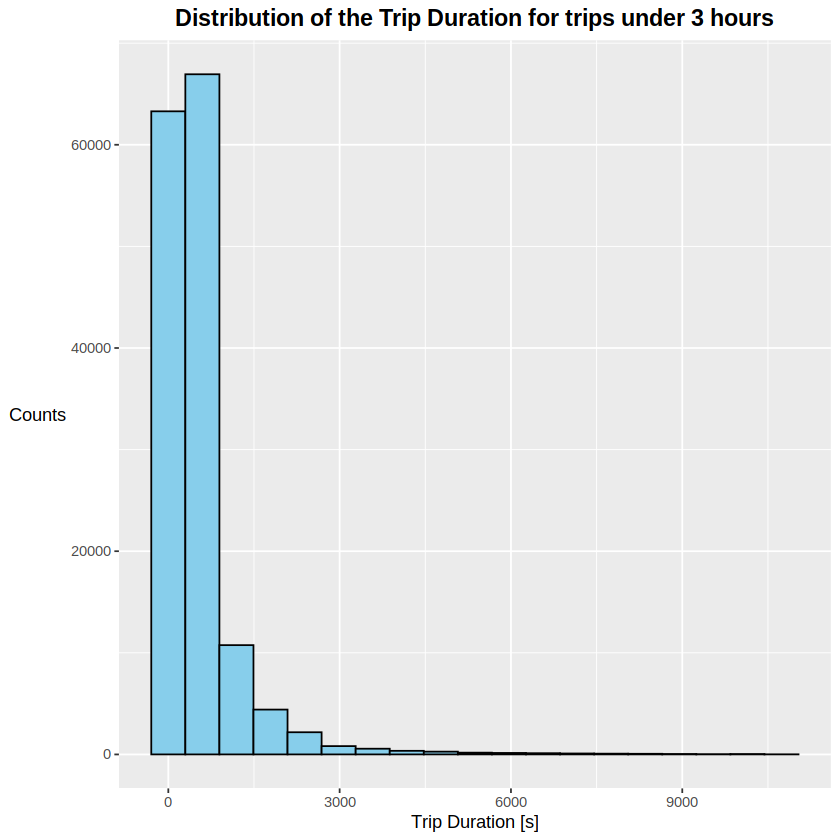

In [8]:
#4.4) plot the distribution of trip duration after the skimming of the previous point

#i'll try 3 different bins calculations and choose the one i found the best
bins1 = ceiling(sqrt(length(less_dataset$tripduration))) #Square Root Rule
bins2 = ceiling(log2(length(less_dataset$tripduration)) + 1) #Sturges' Rule
bins3 = ceiling(2 * (length(less_dataset$tripduration))^(1/3)) #Rice Rule

ggplot(less_dataset, aes(x=tripduration)) +
    geom_histogram(bins=bins2, fill="sky blue", color="black") +
    labs(x="Trip Duration [s]",
         y="Counts",
         title="Distribution of the Trip Duration for trips under 3 hours") +
    theme(axis.title.y = element_text(angle = 0, vjust = 0.5),
          plot.title = element_text(hjust = 0.5, size = 14, face = "bold"))

$feb
[1] 605.34

$mar
[1] 546.18

$apr
[1] 714

$may
[1] 824.12

$jun
[1] 973.69

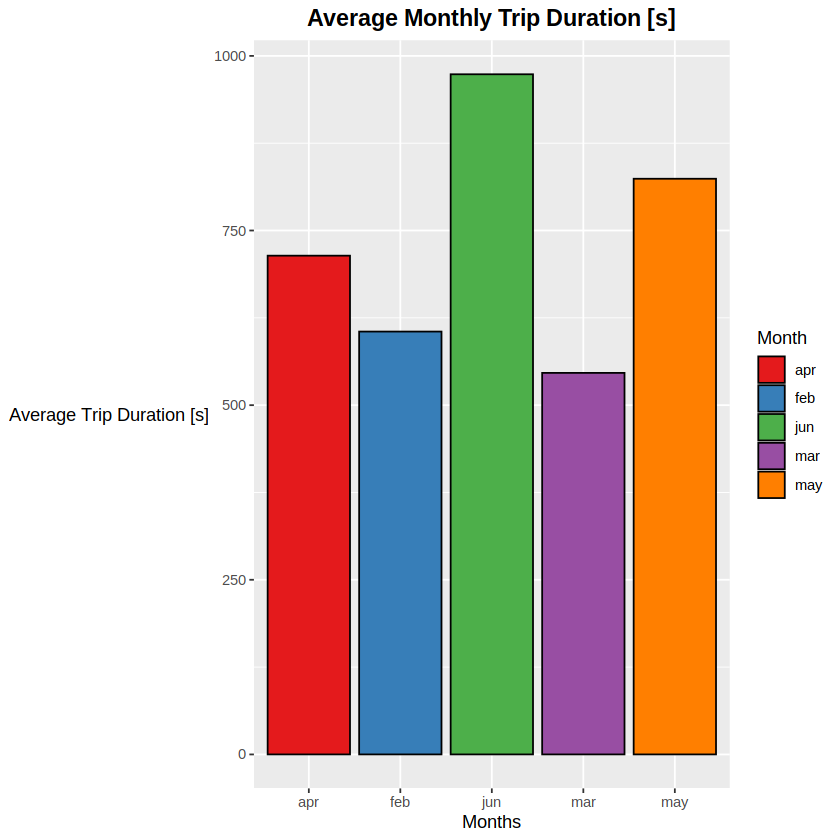

In [9]:
#5) plot the monthly average trip duration

months = list(feb = feb, mar = mar, apr = apr, may = may, jun = jun)
tp_month_avg_list = list() #creating empty list to then store values

for (month in names(months)) {
  tp_month_avg = round(mean(months[[month]]$tripduration), 2)
  tp_month_avg_list[[month]] <- tp_month_avg
}

tp_month_avg_list

avg_trip_data <- data.frame(
  Month = names(tp_month_avg_list),
  Average_Trip_Duration = unlist(tp_month_avg_list)
)

ggplot(avg_trip_data, aes(x=Month, y=Average_Trip_Duration, fill=Month)) +
    geom_bar(stat ="identity", color="black") + #stat="identity" so that it will use the values and not counts
    labs(title="Average Monthly Trip Duration [s]",
         x="Months",
         y="Average Trip Duration [s]") +
    theme(axis.title.y = element_text(angle = 0, vjust = 0.5),
          plot.title=element_text(hjust=0.5, size=14, face="bold")) + 
    scale_fill_brewer(palette="Set1") #nice for colorblind people

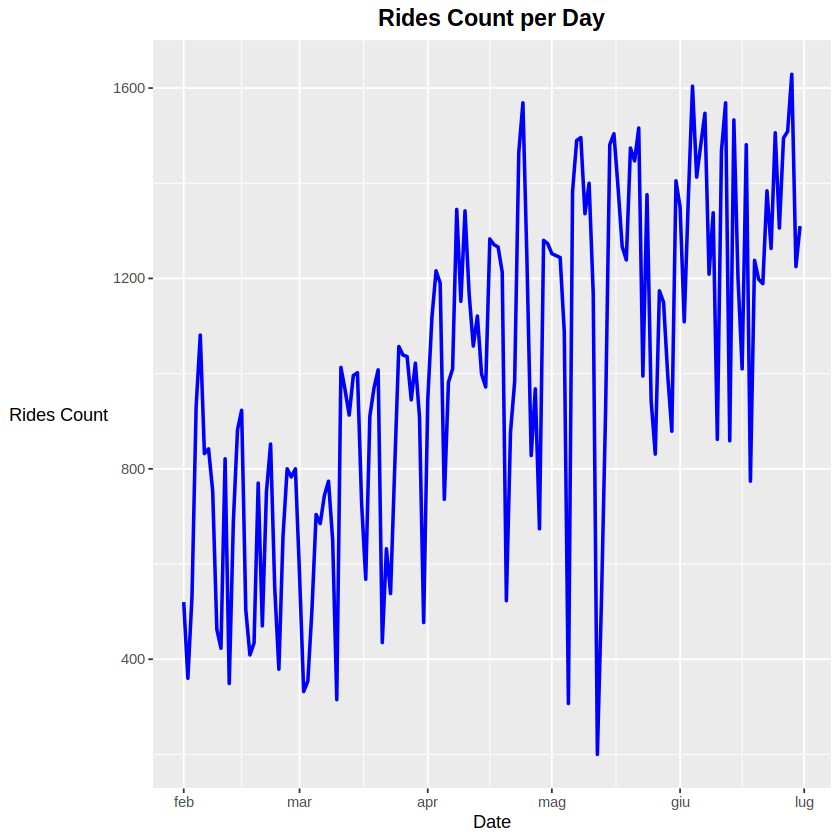

In [21]:
#6.1) plot the number of rides per day

daily_rides <- dataset %>%
  mutate(date=as.Date(starttime)) %>% 
  group_by(date) %>%             
  summarise(ride_count=length(date)) 

ggplot(daily_rides, aes(x=date, y=ride_count)) +
  geom_line(color="blue", linewidth=1) +
  labs(x="Date",
       y="Rides Count",
       title="Rides Count per Day") +
  theme(axis.title.y = element_text(angle = 0, vjust = 0.5),
        plot.title=element_text(hjust=0.5, size=14, face="bold"))

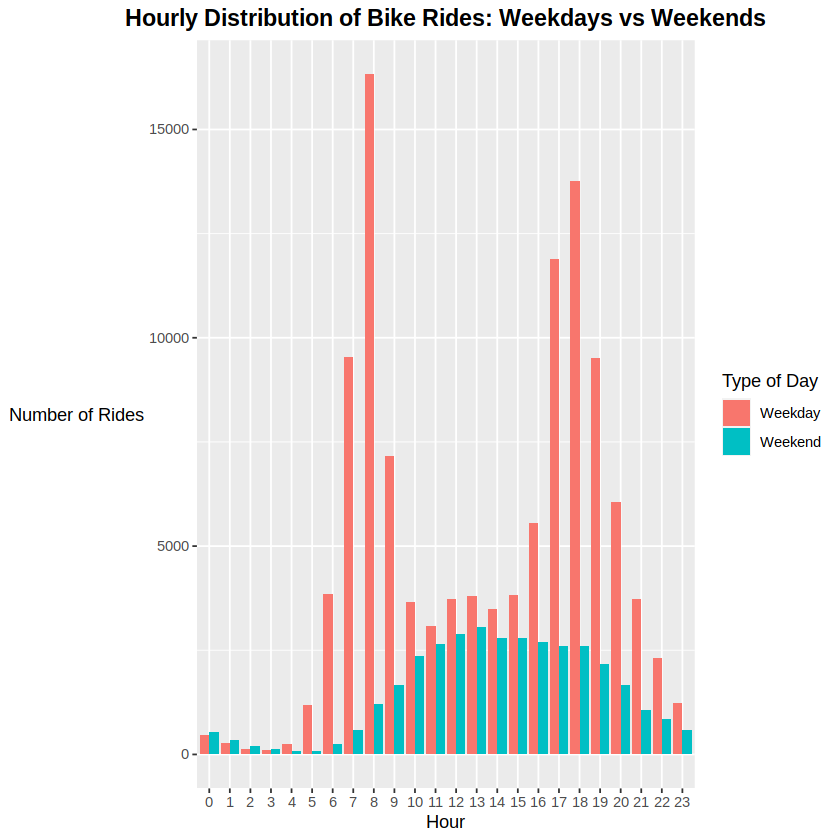

In [11]:
#6.2) plot the hourly distribution on weekdays and on weekends

dataset$hour <- hour(dataset$starttime)
dataset$day_of_week <- wday(dataset$starttime)
dataset$type_of_day <- ifelse(dataset$day_of_week %in% c(1, 7), "Weekend", "Weekday")

ggplot(dataset, aes(x=factor(hour), fill=type_of_day)) +
  geom_bar(position="dodge", stat="count") +
  labs(x="Hour",
       y="Number of Rides",
       title="Hourly Distribution of Bike Rides: Weekdays vs Weekends",
       fill ="Type of Day") +
  theme(axis.title.y = element_text(angle = 0, vjust = 0.5), 
        plot.title=element_text(hjust=0.5, size=14, face="bold")) + 
  scale_x_discrete(labels=as.character(0:23))

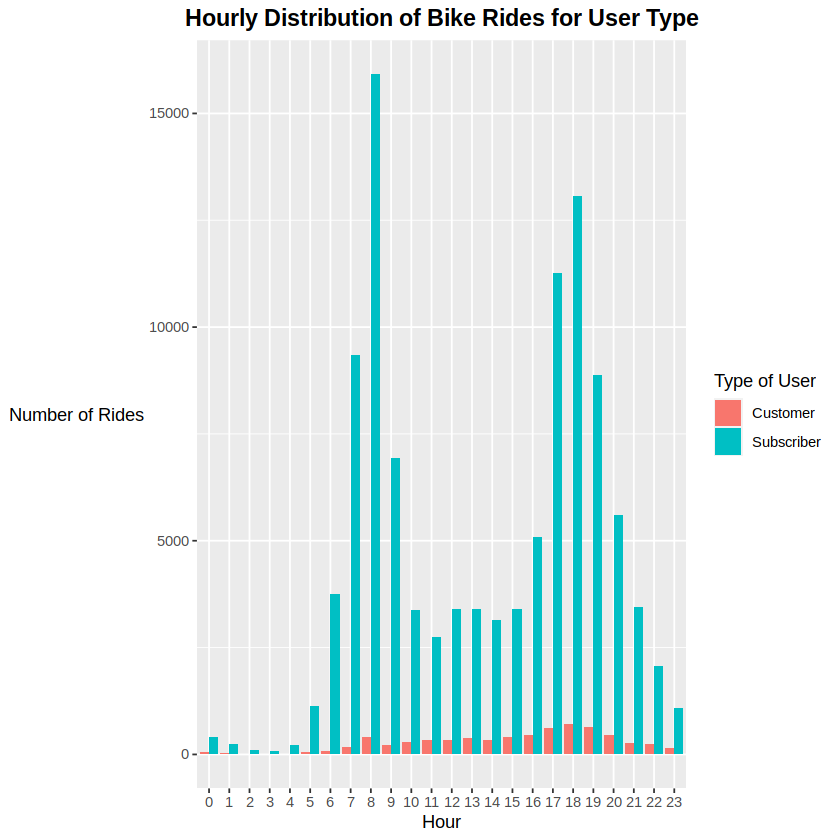

In [12]:
#6.3) plot again the average hourly distribution on weekdays but separating customer and subscriber
#users

weekday_dataset <- filter(dataset, type_of_day=="Weekday")

ggplot(weekday_dataset, aes(x=factor(hour), fill=usertype)) + 
    geom_bar(position="dodge", stat="count") + 
    labs(x="Hour", 
         y="Number of Rides",
         title="Hourly Distribution of Bike Rides for User Type",
         fill="Type of User") + 
    theme(axis.title.y = element_text(angle = 0, vjust = 0.5), 
          plot.title=element_text(hjust=0.5, size=14, face="bold")) + 
    scale_x_discrete(labels=as.character(0:23))

In [13]:
#7.1) using the latitude and longitude information , evaluate the average speed (in km/h) of a user,
#discarding the trip lasting longer than 1 hour

one_hour_trips <- filter(dataset, tripduration<=3600)

one_hour_trips$distance_in_km <- sqrt(
    ((one_hour_trips$end.station.longitude - one_hour_trips$start.station.longitude)*111*
     cos(one_hour_trips$end.station.latitude - one_hour_trips$start.station.latitude))^2 +
                         ((one_hour_trips$end.station.latitude - one_hour_trips$start.station.latitude)*111)^2) 

one_hour_trips$km_h <- one_hour_trips$distance_in_km / ((one_hour_trips$tripduration)/3600)
average_km_h = mean(one_hour_trips$km_h)
cat("The average km/h for trips under 1 hour is: ", round(average_km_h,2))

The average km/h for trips under 1 hour is:  10.59

In [2]:
#7.2) plot the average speed as a function of route length for the following group of distances d < 500 m,
#500 m < d < 1000 m, 1000 m < d < 2000 m, 2000 m < d < 3000 m, d > 3000 m and discarding
#trips longer than 1 hour
one_hour_trips$trip_distance <- ifelse(
  one_hour_trips$distance_in_km < 0.5, "d < 0.5", 
  ifelse(one_hour_trips$distance_in_km >= 0.5 & one_hour_trips$distance_in_km < 1, "0.5 <= d < 1.0", 
  ifelse(one_hour_trips$distance_in_km >= 1 & one_hour_trips$distance_in_km < 2, "1.0 <= d < 2.0", 
  ifelse(one_hour_trips$distance_in_km >= 2 & one_hour_trips$distance_in_km < 3, "2.0 <= d < 3.0", "d >= 3.0"))))

avg_trips <- one_hour_trips %>%
    group_by(trip_distance, type_of_day) %>%
    summarize(avg_speed = mean(km_h), .groups="drop")

ggplot(avg_trips, aes(x=trip_distance, y=avg_speed, fill=trip_distance)) + 
    geom_bar(position="dodge", stat="identity") + 
    labs(x="Trips Distances Groups", 
         y="Average Speed", 
         title="Average Speed for Every Group of Distances", 
         fill="Trip Distance Groups") +
    theme(axis.title.y = element_text(angle = 0, vjust = 0.5), 
          plot.title=element_text(hjust=0.5, size=14, face="bold")) + 
    scale_fill_brewer(palette="Set1")

ERROR: Error in eval(expr, envir, enclos): object 'one_hour_trips' not found


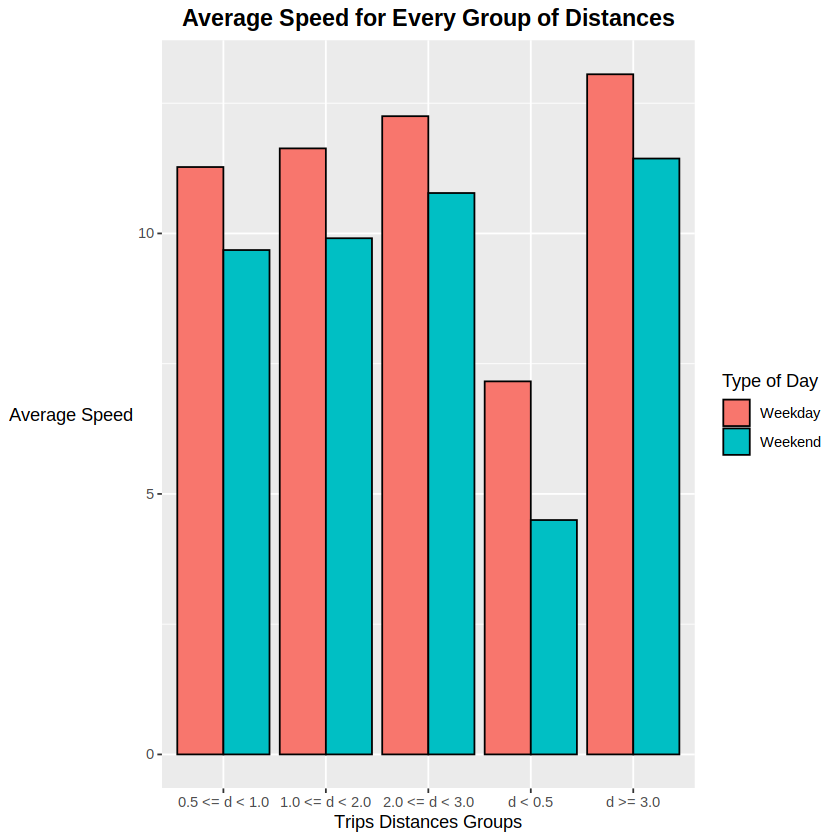

In [15]:
#7.3) repeat the same graph, but show the results obtained separately for weekdays and weekends

ggplot(avg_trips, aes(x=trip_distance, y=avg_speed, fill=type_of_day)) +
  geom_bar(position="dodge", stat="identity", color="black") +
  labs(x="Trips Distances Groups", 
       y="Average Speed", 
       title="Average Speed for Every Group of Distances", 
       fill="Type of Day") +
  theme(axis.title.y = element_text(angle = 0, vjust = 0.5), 
        plot.title=element_text(hjust=0.5, size=14, face="bold"))

In [16]:
#8.1) find the most common start station and the least popular end station

top_start_station = names(which.max(table(dataset$start.station.name)))
bot_end_station = names(which.min(table(dataset$end.station.name)))

cat("The most common start station is: ", top_start_station, "\n")
cat("The least common end station is: ", bot_end_station)

The most common start station is:  Grove St PATH 
The least common end station is:  1 Ave & E 16 St

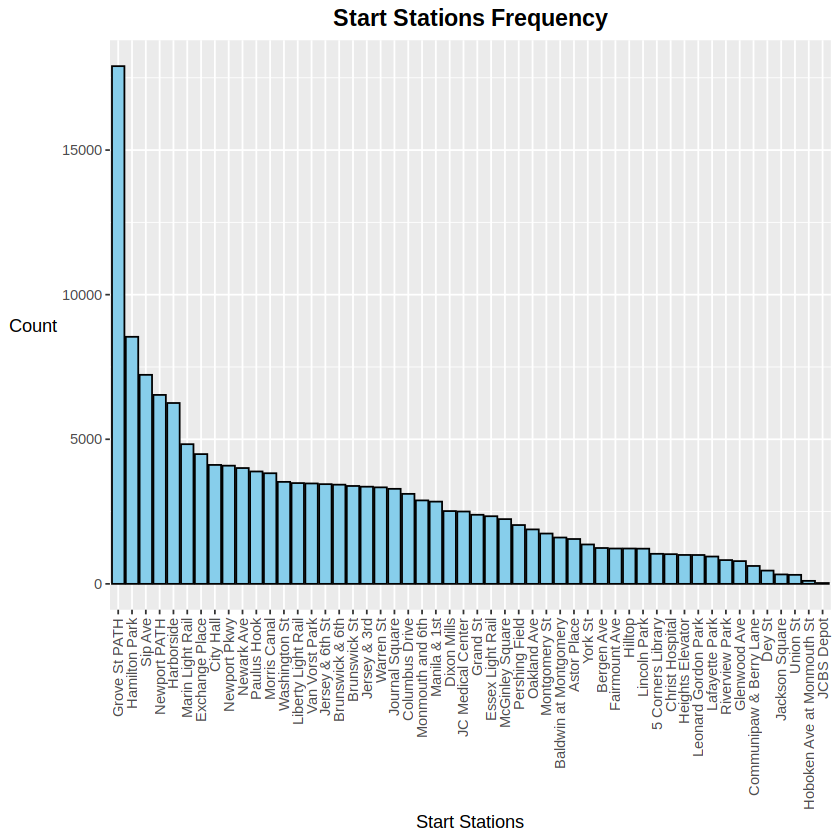

In [20]:
#8.2) show the distribution of start stations
station_count <- dataset %>%
    group_by(start.station.name) %>%
    summarize(count=length(start.station.name))

ggplot(station_count, aes(x=reorder(start.station.name, -count), y=count)) + 
    geom_bar(position="dodge", stat="identity", fill="sky blue", color="black") + 
    labs(x="Start Stations", 
         y="Count", 
         title="Start Stations Frequency") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1), 
          axis.title.y = element_text(angle = 0, vjust = 0.5),
          plot.title=element_text(hjust=0.5, size=14, face="bold"))

In [19]:
#8.3) find the three most common routes (start and end station) and the three least popular ones

route_freq <- dataset %>%
  group_by(start.station.name, end.station.name) %>%
  summarize(count=length(start.station.name), .groups = "drop")

top_routes <- route_freq %>%
  arrange(desc(count)) %>%
  slice(1:3)

bot_routes <- route_freq %>%
  arrange(count) %>%
  slice(1:3)

kable(top_routes, caption = "Top 3 Most Common Routes")
kable(bot_routes, caption = "Top 3 Least Common Routes")



Table: Top 3 Most Common Routes

|start.station.name |end.station.name | count|
|:------------------|:----------------|-----:|
|Hamilton Park      |Grove St PATH    |  3037|
|Grove St PATH      |Hamilton Park    |  2318|
|Brunswick & 6th    |Grove St PATH    |  1916|



Table: Top 3 Least Common Routes

|start.station.name |end.station.name | count|
|:------------------|:----------------|-----:|
|5 Corners Library  |Dixon Mills      |     1|
|5 Corners Library  |Grand St         |     1|
|Astor Place        |Brunswick & 6th  |     1|